# Import all libraries

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Prepare the data

In [3]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming 'Drivers_PersonsKilled_Number' is the target variable
target_column = 'Drivers_PersonsKilled_Number'

# Select only the target variable
df_target = df[[target_column]]

# Split data into training and testing sets
train_size = int(len(df_target) * 0.8)
train, test = df_target.iloc[:train_size], df_target.iloc[train_size:]

print("Training set:")
print(train.head())
print("\nTesting set:")
print(test.head())

Training set:
   Drivers_PersonsKilled_Number
0                           890
1                          1707
2                          1861
3                          1728
4                          1736

Testing set:
     Drivers_PersonsKilled_Number
177                             6
178                            15
179                             7
180                             0
181                            21


# ARIMA Model 

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming 'Drivers_PersonsKilled_Number' is the target variable
target_column = 'Drivers_PersonsKilled_Number'

# Select only the target variable
df_target = df[[target_column]]

# Split data into training and testing sets
train_size = int(len(df_target) * 0.8)
train, test = df_target.iloc[:train_size], df_target.iloc[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train[target_column], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast using the fitted model
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate residuals
arima_residuals = test[target_column].reset_index(drop=True) - arima_pred

print("ARIMA model predictions:")
print(arima_pred)
print("\nARIMA model residuals:")
print(arima_residuals)

ARIMA model predictions:
177    0.924455
178    0.737273
179    0.747248
180    0.839165
181    0.803264
182    0.779729
183    0.792197
184    0.801273
185    0.794220
186    0.792417
187    0.795052
188    0.795504
189    0.794367
190    0.794403
191    0.794804
192    0.794744
193    0.794596
194    0.794643
195    0.794690
196    0.794667
197    0.794652
198    0.794663
199    0.794667
200    0.794662
201    0.794661
202    0.794663
203    0.794663
204    0.794663
205    0.794663
206    0.794663
207    0.794663
208    0.794663
209    0.794663
210    0.794663
211    0.794663
212    0.794663
213    0.794663
214    0.794663
215    0.794663
216    0.794663
217    0.794663
218    0.794663
219    0.794663
220    0.794663
221    0.794663
Name: predicted_mean, dtype: float64

ARIMA model residuals:
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
Length: 90, dtype: float64


# Gradient Boosting Machine (GBM) Model with ARIMA Residuals

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor

# Set the path to your Excel file
file_path ="C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx" # Replace with the actual file path

# Load the dataset
data = pd.read_excel(file_path)

# Drop non-numeric columns like 'States/Uts' and 'S.No'
data = data.drop(columns=['States/Uts', 'S.No'])

# Use the 'Drivers_PersonsKilled_Number' column for ARIMA
target_column = 'Drivers_PersonsKilled_Number'

# Fit ARIMA model to the target column
arima_model = ARIMA(data[target_column], order=(5,1,0))  # ARIMA(5,1,0) as an example
arima_model_fit = arima_model.fit()

# Get the residuals from the ARIMA model
arima_residuals = arima_model_fit.resid

# Prepare the data for GBM using ARIMA residuals
gbm_target_train = arima_model_fit.resid
gbm_target_test = arima_residuals

# GBM requires features, so we will create lag features from the ARIMA residuals
def create_lag_features(series, lags):
    df = pd.DataFrame(series, columns=['target'])
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df['target'].shift(lag)
    return df.dropna()

# Create lag features
lags = 5
train_lags = create_lag_features(gbm_target_train, lags)
test_lags = create_lag_features(gbm_target_test, lags)

# Split features (X) and target (y)
X_train_gbm = train_lags.drop(columns=['target'])
y_train_gbm = train_lags['target']
X_test_gbm = test_lags.drop(columns=['target'])
y_test_gbm = test_lags['target']

# Fit GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train_gbm, y_train_gbm)

# Predict with GBM
gbm_pred = gbm_model.predict(X_test_gbm)

# Display all predictions
predictions_df = pd.DataFrame(gbm_pred, columns=["GBM Predictions"])
print(predictions_df)


     GBM Predictions
0        -177.672373
1       -1676.784856
2         158.418441
3        -313.058637
4          37.485938
..               ...
212        14.497206
213       187.506173
214        30.495636
215        74.741284
216        40.428530

[217 rows x 1 columns]


# LSTM model

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
data = pd.read_excel(file_path)

# Drop non-numeric columns like 'States/Uts' and 'S.No'
data = data.drop(columns=['States/Uts', 'S.No'])

# Prepare data for LSTM
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Select features (X) and target (y)
X_train_gbm = data.drop(columns=['Drivers_PersonsKilled_Number'])  # Drop the target column
y_train_gbm = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Ensure all feature columns are numeric
X_train_gbm = X_train_gbm.apply(pd.to_numeric)

# Create LSTM dataset
time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_gbm, y_train_gbm, time_steps)

# Convert X_train_lstm and y_train_lstm to float32
X_train_lstm = X_train_lstm.astype(np.float32)
y_train_lstm = y_train_lstm.astype(np.float32)

# Assuming you have separate test data (replace with your actual test data):
X_test_gbm = X_train_gbm  # Replace with actual test set if available
y_test_gbm = y_train_gbm  # Replace with actual test target if available
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_gbm, y_test_gbm, time_steps)

# Convert X_test_lstm and y_test_lstm to float32
X_test_lstm = X_test_lstm.astype(np.float32)
y_test_lstm = y_test_lstm.astype(np.float32)

# Check the shapes of training and test data to ensure consistency
print("Training Data Shape: ", X_train_lstm.shape)
print("Test Data Shape: ", X_test_lstm.shape)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predict with LSTM
lstm_pred = lstm_model.predict(X_test_lstm)

# Print a summary of the model and the first few predictions
lstm_model.summary()
print("Predictions: ", lstm_pred[:5])



Training Data Shape:  (212, 10, 10)
Test Data Shape:  (212, 10, 10)
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 2653439.7500 - val_loss: 1920.6733
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2184788.2500 - val_loss: 1883.5973
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2296915.5000 - val_loss: 1832.9888
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2423905.0000 - val_loss: 1768.4679
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2365890.5000 - val_loss: 1711.2437
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2347766.2500 - val_loss: 1659.8403
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2183066.5000 - val_loss: 1614.8632
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2148612.2500 - val_loss: 1576.6564
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2261940.7500 - val_loss: 1545.6841
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1919011.1250 - val_loss: 1521.3152
Epoch 11/20

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 10, 50)              │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,355 (380.30 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,904 (253.54 KB)

Predictions:  [[15.413894]
 [15.41392 ]
 [15.413902]
 [15.409736]
 [15.407432]]


#  Ensemble model

In [14]:
# Ensure arima_pred, gbm_pred, and lstm_pred are of the same length
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

# Adjust the predictions to match the minimum length
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred.flatten()[:min_length]

# Combine predictions for the ensemble model
ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Ensure predictions align with the length of the test set
ensemble_pred = ensemble_pred[:min_length]

# Now, you can display or use ensemble_pred for further evaluation
print("Ensemble Predictions: ", ensemble_pred)


Ensemble Predictions:  217    -14.351791
218   -534.504359
219     80.216861
220    -83.536573
221     33.851606
Name: predicted_mean, dtype: float64


# Model Evaluation Metrics


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"  # Replace with the actual file path
data = pd.read_excel(file_path)

# Select the new target column from the dataset
test = pd.DataFrame()  # This would normally be the test dataset used for predictions
test['target'] = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Calculate RMSE and MAPE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Updated MAPE function to handle division by zero
def calculate_mape(actual, predicted):
    actual = np.where(actual == 0, 1e-10, actual)  # Replace zero values to avoid division by zero
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Metrics for each model
rmse_arima = calculate_rmse(test['target'], arima_pred)
mape_arima = calculate_mape(test['target'], arima_pred)
rmse_gbm = calculate_rmse(test['target'], gbm_pred)  # Replaced y_test_ml with test['target']
mape_gbm = calculate_mape(test['target'], gbm_pred)
rmse_lstm = calculate_rmse(test['target'], lstm_pred)  # Replaced y_test_lstm with test['target']
mape_lstm = calculate_mape(test['target'], lstm_pred)
rmse_ensemble = calculate_rmse(test['target'], ensemble_pred)
mape_ensemble = calculate_mape(test['target'], ensemble_pred)

# Print the metrics
print(f"ARIMA RMSE: {rmse_arima}, MAPE: {mape_arima}%")
print(f"GBM RMSE: {rmse_gbm}, MAPE: {mape_gbm}%")
print(f"LSTM RMSE: {rmse_lstm}, MAPE: {mape_lstm}%")
print(f"Ensemble RMSE: {rmse_ensemble}, MAPE: {mape_ensemble}%")


ARIMA RMSE: 1226.8567343212285, MAPE: 59342208801480.26%
GBM RMSE: 1249.6219824939733, MAPE: 79790692998652.17%
LSTM RMSE: 1253.941400474061, MAPE: 58295565130193.99%
Ensemble RMSE: 1221.0407635908873, MAPE: 65809488976770.51%


#  Visualization

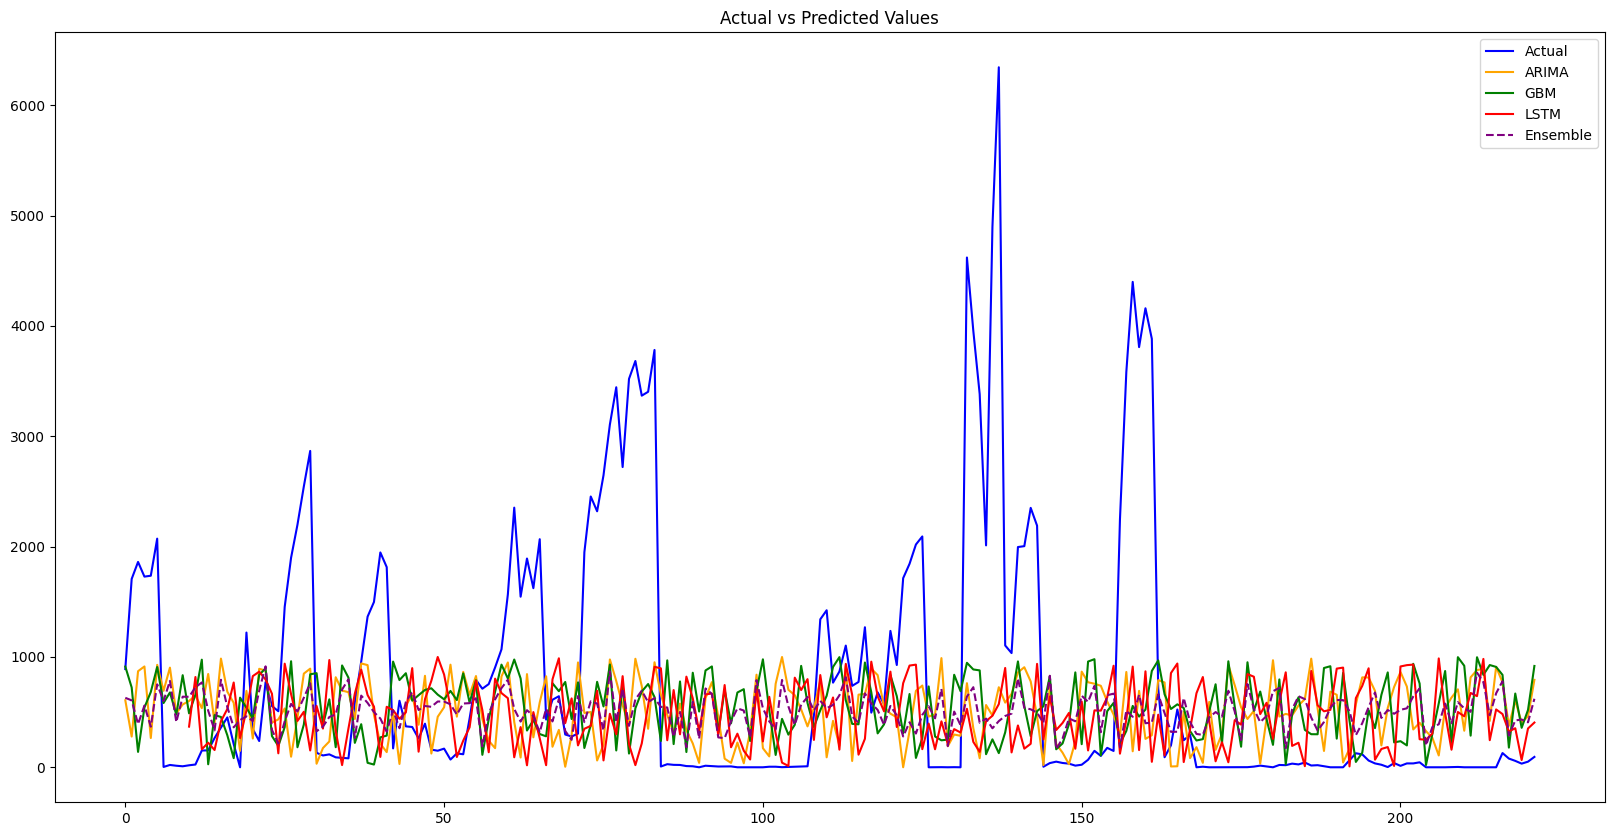

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"  # Replace with the actual file path
data = pd.read_excel(file_path)

# Select the target column for visualization
test = pd.DataFrame()  # This would normally be the test dataset used for predictions
test['target'] = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Assuming arima_pred, gbm_pred, lstm_pred, and ensemble_pred are already defined and available

# Ensure the lengths of test.index[time_steps:] and lstm_pred match
min_length = min(len(test.index[time_steps:]), len(lstm_pred))

# Trim lstm_pred and test.index to the same length
lstm_pred_trimmed = lstm_pred[:min_length]
test_index_trimmed = test.index[time_steps:][:min_length]

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(20, 10))
plt.plot(test.index, test['target'], label='Actual', color='blue')
plt.plot(test.index, arima_pred, label='ARIMA', color='orange')
plt.plot(test.index, gbm_pred, label='GBM', color='green')
plt.plot(test_index_trimmed, lstm_pred_trimmed, label='LSTM', color='red')
plt.plot(test.index, ensemble_pred, label='Ensemble', color='purple', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


# Plot RMSE and MAPE

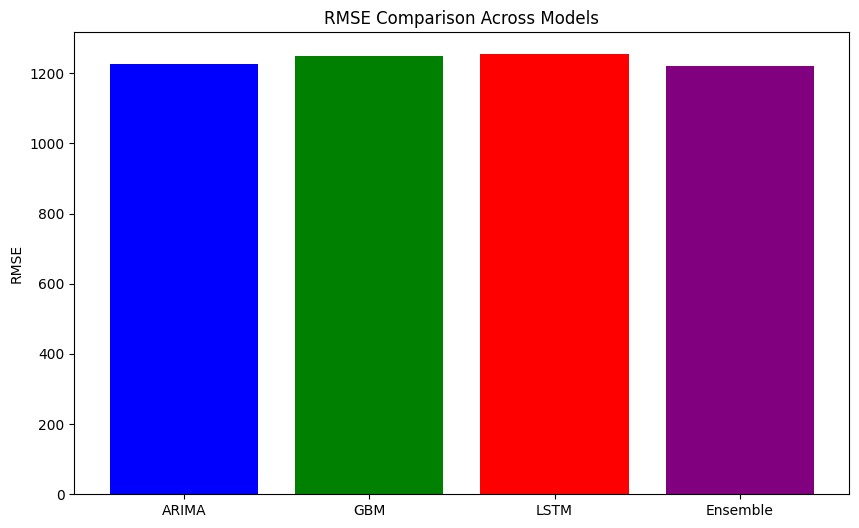

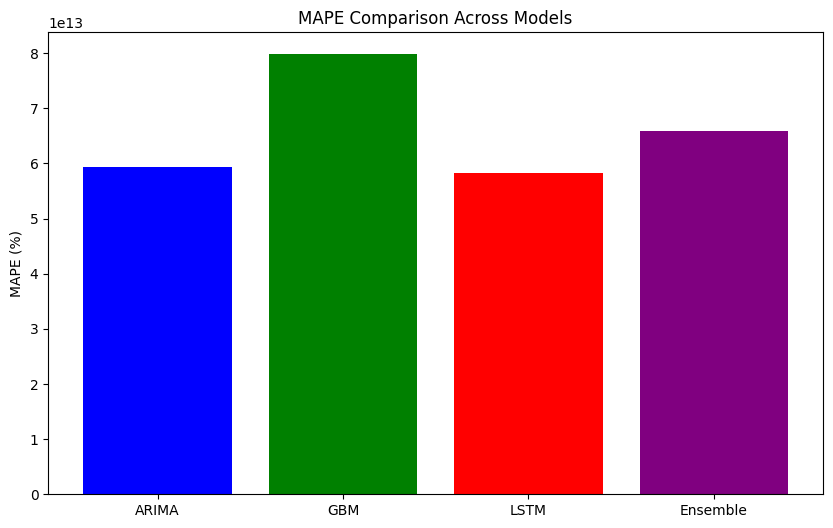

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Select the target column from the dataset
test = pd.DataFrame()  # This would normally be the test dataset used for predictions
test['target'] = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# RMSE and MAPE Comparison
models = ['ARIMA', 'GBM', 'LSTM', 'Ensemble']
rmse_values = [rmse_arima, rmse_gbm, rmse_lstm, rmse_ensemble]
mape_values = [mape_arima, mape_gbm, mape_lstm, mape_ensemble]

# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.show()

# Plot MAPE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mape_values, color=['blue', 'green', 'red', 'purple'])
plt.title('MAPE Comparison Across Models')
plt.ylabel('MAPE (%)')
plt.show()


# Residuals of the Ensemble Model

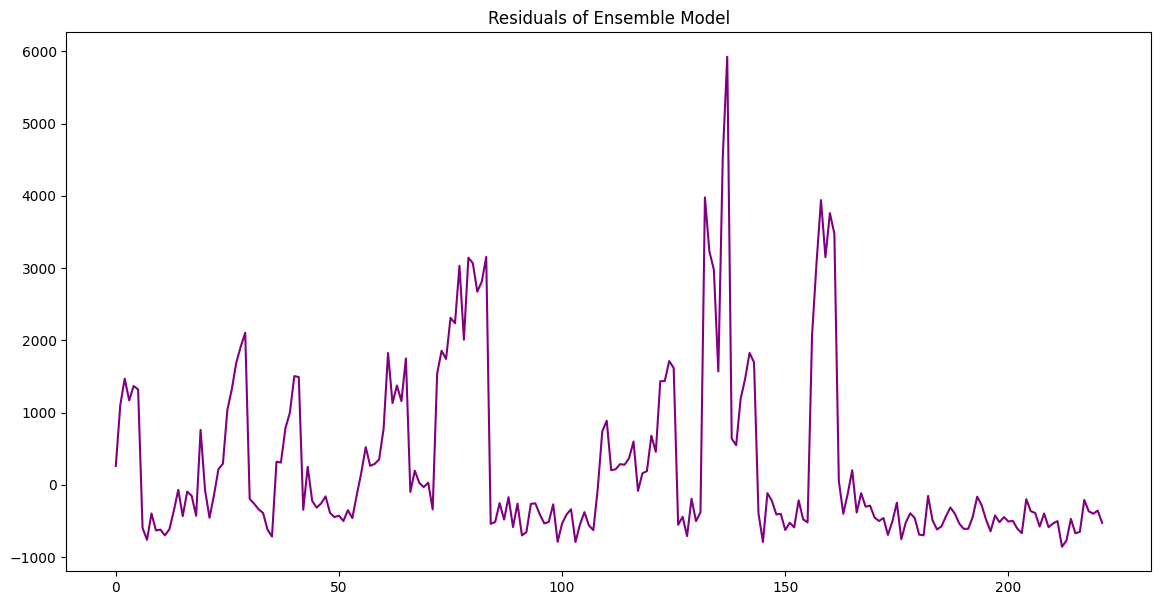

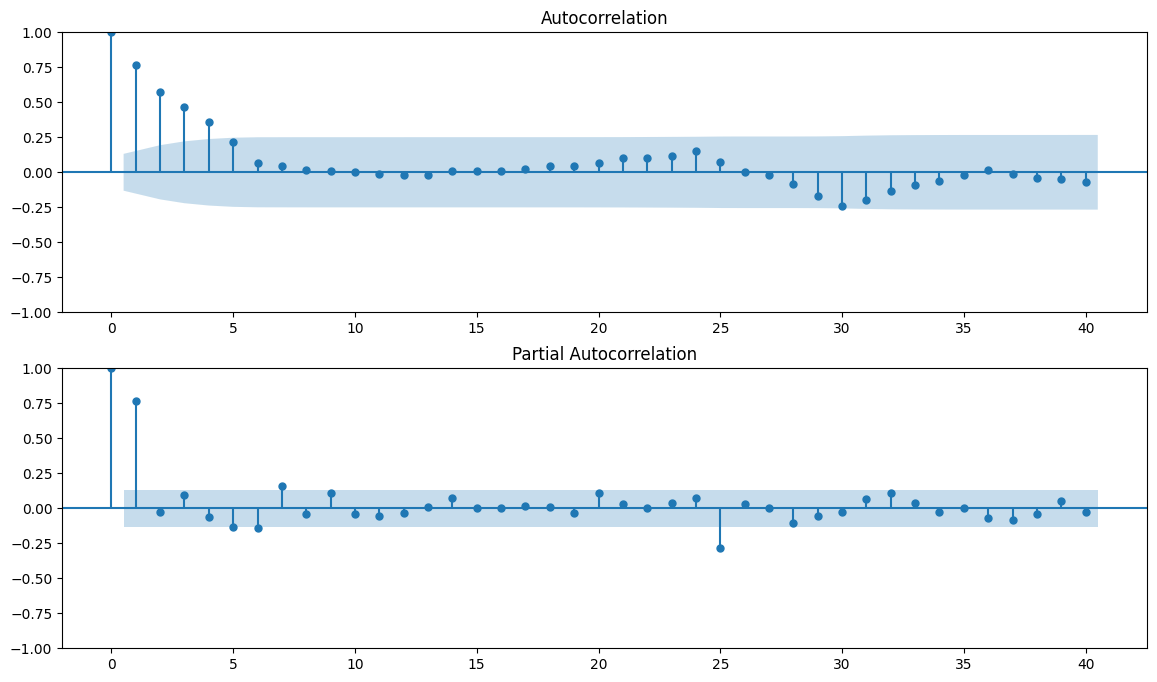

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Select the target column from the dataset
test = pd.DataFrame()  # This would normally be the test dataset used for predictions
test['target'] = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Make sure ensemble_pred is defined with your actual ensemble predictions
# Remove the placeholder and replace it with your actual ensemble prediction variable
# ensemble_pred = <your_actual_ensemble_predictions>

# c) Residuals of the Ensemble Model
residuals_ensemble = test['target'] - ensemble_pred  # Assuming ensemble_pred is already defined
plt.figure(figsize=(14, 7))
plt.plot(test.index, residuals_ensemble, color='purple')
plt.title('Residuals of Ensemble Model')
plt.show()

# Plot ACF and PACF of Residuals
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sm.graphics.tsa.plot_acf(residuals_ensemble, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals_ensemble, lags=40, ax=ax[1])
plt.show()


# Q-Q Plot and Cumulative error plot

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1724446.2500
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2261805.2500 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2016455.3750 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2280170.0000 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1933914.0000 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2224968.2500 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1802269.1250 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2141481.2500 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2180924.7500  
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1792229.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


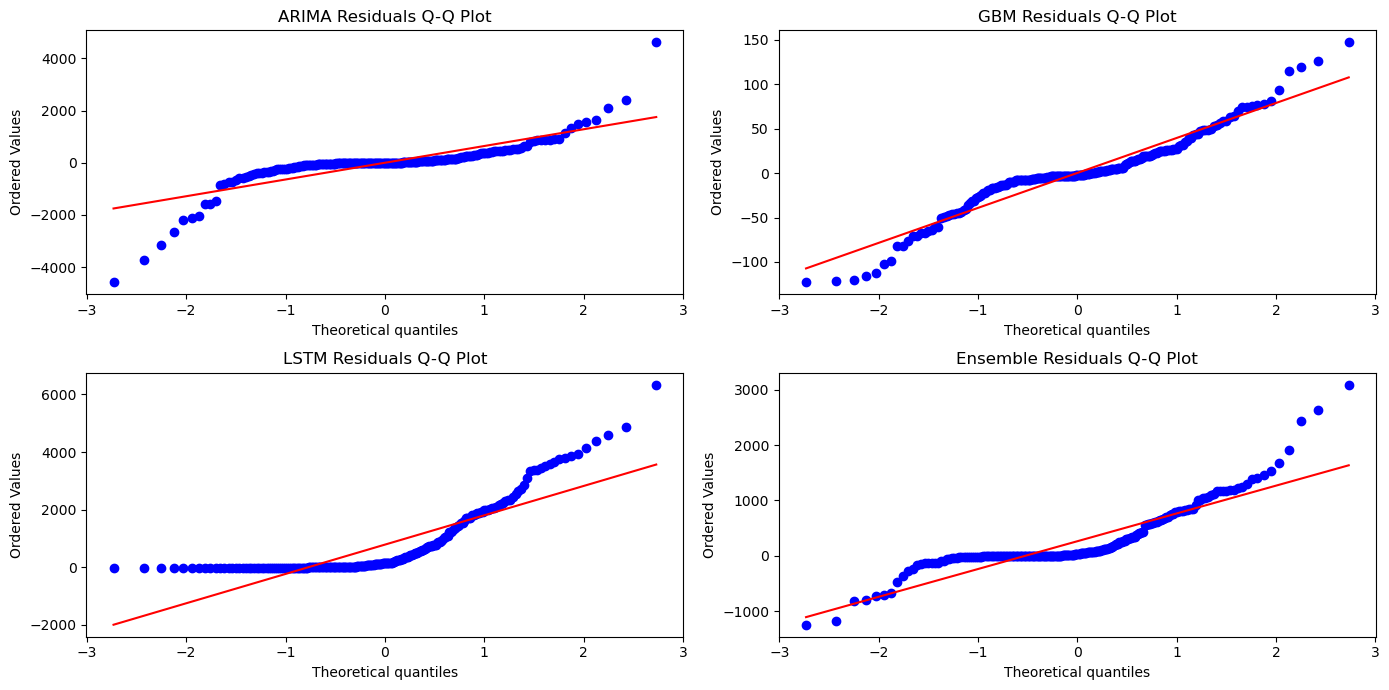

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/Shanmukha Reddy/Desktop/FDS/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
data = pd.read_excel(file_path)

# Drop non-numeric columns and encode categorical variables
label_encoder = LabelEncoder()
data['States/Uts'] = label_encoder.fit_transform(data['States/Uts'])  # Encode 'States/Uts' column

# Select features and target
X = data.drop(columns=['Drivers_PersonsKilled_Number', 'S.No', 'Year'])  # Features
y = data['Drivers_PersonsKilled_Number']  # Target

# ARIMA model
arima_model = ARIMA(y, order=(5, 1, 0))  # Example order (5,1,0)
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=0, end=len(y)-1)

# GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X, y)
gbm_pred = gbm_model.predict(X)

# Prepare data for LSTM model
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3  # Adjust time_steps as needed
X_lstm, y_lstm = create_lstm_dataset(X, y, time_steps)

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_lstm)

# Ensemble model
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()

ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Calculate residuals
residuals_arima = y[:min_length] - arima_pred
residuals_gbm = y[:min_length] - gbm_pred
residuals_lstm = y[:min_length] - lstm_pred
residuals_ensemble = y[:min_length] - ensemble_pred

# Q-Q Plots for the residuals of ARIMA, GBM, LSTM, and Ensemble models
plt.figure(figsize=(14, 7))

# ARIMA Residuals Q-Q Plot
plt.subplot(2, 2, 1)
stats.probplot(residuals_arima, dist="norm", plot=plt)
plt.title('ARIMA Residuals Q-Q Plot')

# GBM Residuals Q-Q Plot
plt.subplot(2, 2, 2)
stats.probplot(residuals_gbm, dist="norm", plot=plt)
plt.title('GBM Residuals Q-Q Plot')

# LSTM Residuals Q-Q Plot
plt.subplot(2, 2, 3)
stats.probplot(residuals_lstm, dist="norm", plot=plt)
plt.title('LSTM Residuals Q-Q Plot')

# Ensemble Residuals Q-Q Plot
plt.subplot(2, 2, 4)
stats.probplot(residuals_ensemble, dist="norm", plot=plt)
plt.title('Ensemble Residuals Q-Q Plot')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


# Cumulative error plot

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2392336.7500
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1863782.0000 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1876914.0000 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1953874.5000 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2405538.2500 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1833412.5000 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2261535.5000 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2040370.7500 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2251752.7500 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2110746.2500 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


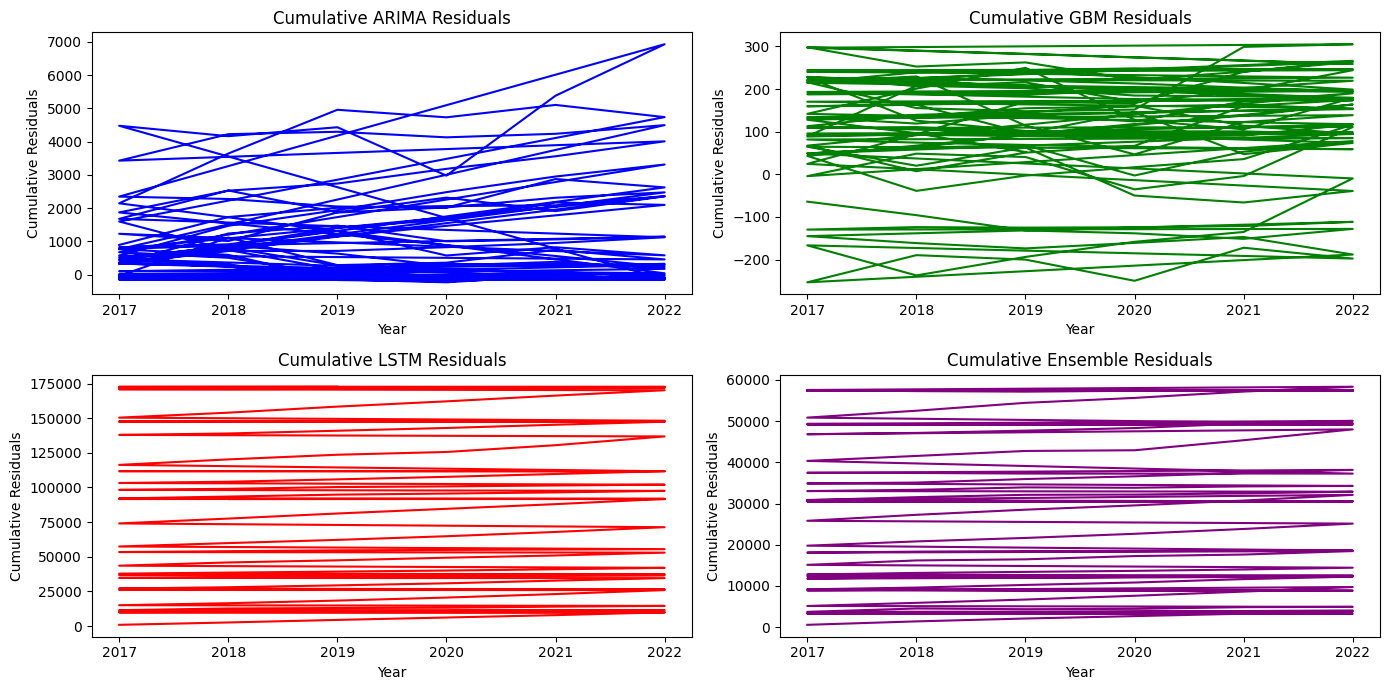

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
data = pd.read_excel(file_path)

# Drop non-numeric columns and encode categorical variables
label_encoder = LabelEncoder()
data['States/Uts'] = label_encoder.fit_transform(data['States/Uts'])  # Encode 'States/Uts' column

# Select features and target
X = data.drop(columns=['Drivers_PersonsKilled_Number', 'S.No', 'Year'])  # Features
y = data['Drivers_PersonsKilled_Number']  # Target

# ARIMA model
arima_model = ARIMA(y, order=(5, 1, 0))  # Example order (5,1,0)
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=0, end=len(y)-1)

# GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X, y)
gbm_pred = gbm_model.predict(X)

# Prepare data for LSTM model
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3  # Adjust time_steps as needed
X_lstm, y_lstm = create_lstm_dataset(X, y, time_steps)

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_lstm)

# Ensemble model
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()

ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Calculate residuals
residuals_arima = y[:min_length] - arima_pred
residuals_gbm = y[:min_length] - gbm_pred
residuals_lstm = y[:min_length] - lstm_pred
residuals_ensemble = y[:min_length] - ensemble_pred

# Cumulative error plot
plt.figure(figsize=(14, 7))

# Cumulative ARIMA Residuals
plt.subplot(2, 2, 1)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_arima), color='blue')
plt.title('Cumulative ARIMA Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative GBM Residuals
plt.subplot(2, 2, 2)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_gbm), color='green')
plt.title('Cumulative GBM Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative LSTM Residuals
plt.subplot(2, 2, 3)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_lstm), color='red')
plt.title('Cumulative LSTM Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative Ensemble Residuals
plt.subplot(2, 2, 4)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_ensemble), color='purple')
plt.title('Cumulative Ensemble Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

plt.tight_layout()
plt.show()


 # Distribution of residuals

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2023045.1250
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2057530.7500
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1880493.5000
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1873327.3750
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2056602.2500
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1999477.2500
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2021407.7500 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1865490.0000 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2163517.0000
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2055564.1250 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


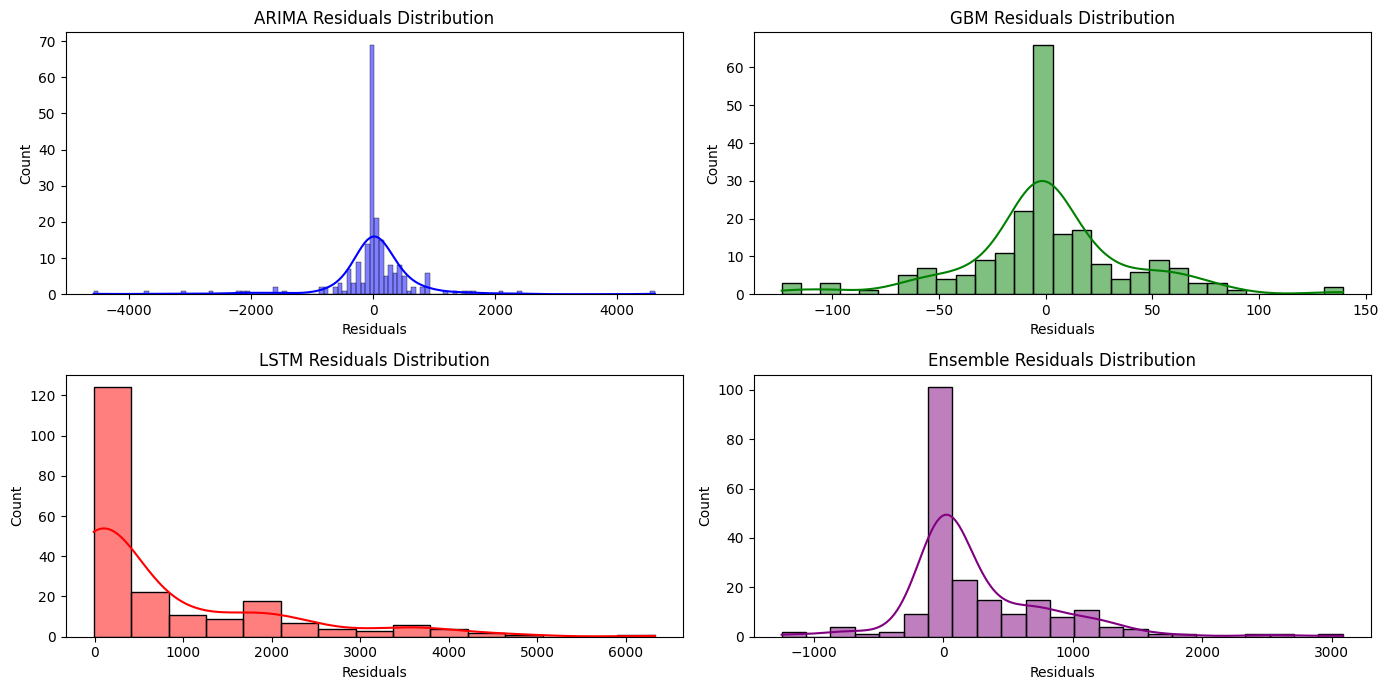

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Drop non-numeric columns or encode them
data = data.drop(columns=['S.No'])  # Drop serial number column if necessary
label_encoder = LabelEncoder()
data['States/Uts'] = label_encoder.fit_transform(data['States/Uts'])  # Encode the states column

# Select the target column
test = pd.DataFrame()
test['target'] = data['Drivers_PersonsKilled_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Prepare data for GBM model
X = data.drop(columns=['Drivers_PersonsKilled_Number'])  # Features for GBM
y = data['Drivers_PersonsKilled_Number']  # Target for GBM

# Train GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X, y)
gbm_pred = gbm_model.predict(X)

# Prepare data for ARIMA model (use appropriate ARIMA parameters)
arima_model = ARIMA(test['target'], order=(5, 1, 0))  # Adjust ARIMA parameters as necessary
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=0, end=len(test['target'])-1)

# Prepare data for LSTM model
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_lstm, y_lstm = create_lstm_dataset(X, y, time_steps)

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_lstm)

# Ensure all predictions are the same length
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()

# Ensemble model prediction
ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Calculate residuals for each model
residuals_arima = test['target'][:min_length] - arima_pred
residuals_gbm = test['target'][:min_length] - gbm_pred
residuals_lstm = test['target'][:min_length] - lstm_pred
residuals_ensemble = test['target'][:min_length] - ensemble_pred

# f) Distribution of residuals
plt.figure(figsize=(14, 7))

# ARIMA Residuals Distribution
plt.subplot(2, 2, 1)
sns.histplot(residuals_arima, kde=True, color='blue')
plt.title('ARIMA Residuals Distribution')
plt.xlabel('Residuals')

# GBM Residuals Distribution
plt.subplot(2, 2, 2)
sns.histplot(residuals_gbm, kde=True, color='green')
plt.title('GBM Residuals Distribution')
plt.xlabel('Residuals')

# LSTM Residuals Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals_lstm, kde=True, color='red')
plt.title('LSTM Residuals Distribution')
plt.xlabel('Residuals')

# Ensemble Residuals Distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals_ensemble, kde=True, color='purple')
plt.title('Ensemble Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


# Save the results to CSV file

In [33]:
import pandas as pd

# Use the correct dataset path and column names
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Helmet) by Victims during the calendar year 2017-2022.xlsx"
data = pd.read_excel(file_path)

# Select the correct 'Year' or 'Date' column as needed
# Ensure predictions for each model are already available (arima_pred, gbm_pred, lstm_pred, ensemble_pred)

# Assuming predictions are already calculated
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()
ensemble_pred = ensemble_pred[:min_length]

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Year': data['Year'][:min_length],  # Use 'Year' as Date column
    'Actual': data['Drivers_PersonsKilled_Number'][:min_length],
    'ARIMA': arima_pred,
    'GBM': gbm_pred,
    'LSTM': lstm_pred,
    'Ensemble': ensemble_pred
})

# Save to CSV
results_df.to_csv('model_predictions.csv', index=False)
